# Practice Simple linear regression

steps to complete a linear regression model
1. reading and understanding the data
2. Trainning the model
3. Residual Analyysis
4. Predicting & Evaaluating the model on a test set

# Step1: Reading & Understanding the data

In [32]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dependent library for building models
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#Reading advertising dataset

add = pd.read_csv('advertising.csv')
add.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
add.shape


(200, 4)

In [3]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
add.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


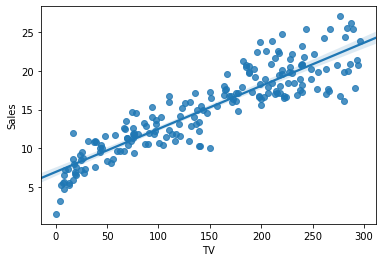

In [5]:
#visuaizing dataset

sns.regplot(x='TV', y='Sales', data=add)

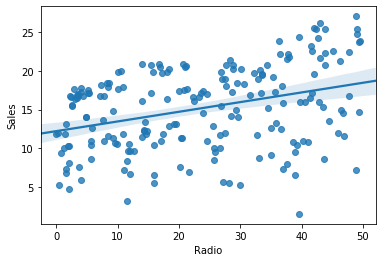

In [6]:
sns.regplot(x='Radio', y='Sales', data=add)

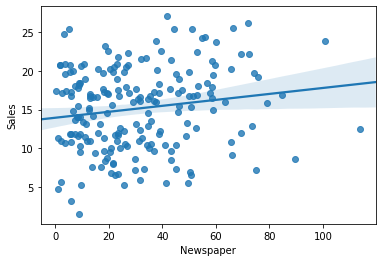

In [7]:
sns.regplot(x='Newspaper', y='Sales', data=add)

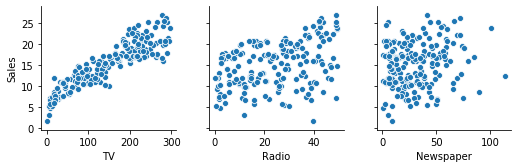

In [8]:
sns.pairplot(data=add, x_vars = ['TV', 'Radio','Newspaper'], y_vars = 'Sales')

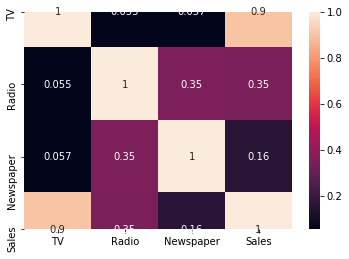

In [9]:
sns.heatmap(add.corr(), annot=True)

In [10]:
add.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Step 2: Model Creation and Trainning

# creating a model

- create x and y
- create train and test the dataset (70-30, 80-20)
- train model on trainning set (learn coefficeits)
- eveluate the model created(should fit well and grneralize on the test)


In [11]:
#creating x & y
X = add['TV']
y = add['Sales']


In [12]:
# train-test split, done by using sklearn train_test_split
#random_state used to 
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.70, random_state=100)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(140,)
(60,)
(140,)
(60,)


# trainning the model

In [13]:
# adding constant(aka- theta 0 ,  beta 0)

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\Users\adash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
# y = c + m1.X1
# y = c.const + m1.TV

# fitting a model - give algo a trainning seet, to learn all the coefficient\
# desining the linear regression(object), just created an object
# OLS- ordinary least squared, to deal with the error wrt each variables, 
# which is the method that 'statsmodels' use to fit the line

lr = sm.OLS(y_train, X_train_sm)

# using the above created object
lr_model =lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [15]:
# sales depends on TV = y = C + m1.TV (i.e 6.94 + 0.05.TV)

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.52e-52
Time:                        18:57:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Statsmodel provides more details, generally used by people from statistics background
Two things here are more important to observe here
1. Coefficient or the intercepter
2. Significance or P value - interpretting the p value we will get to know how how relevent/ effective the model is anything below 0.01 is very low and the product is good got the prediction

Here the Rsquared value is pretty high i.e 81% which means that 81% of the values are explained by the model/varuiable TV

Corelation ~ Causition



where as sklearn is used by people from programming background


In [16]:
# adding this cell for residual testing, to avoid  error
y_train_pred =  lr_model.predict (X_train_sm)

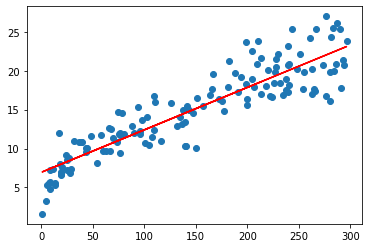

In [17]:
# time to check how well the model does by actually plotting the values in a graph

plt.scatter(X_train, y_train)
#plt.plot(X_train, 6.948683 + 0.054546 * X_train, 'r')
plt.plot(X_train, y_train_pred, 'r')

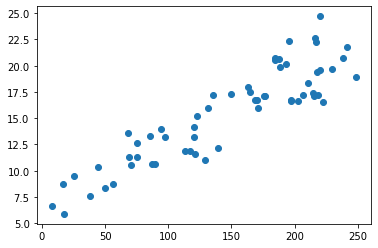

In [18]:
plt.scatter(X_test, y_test)

# Step 3 Residual Analysis

# Checking the model design

we will check the errors , if they are independent variable & normally distributed.
by plotting the residual of the errors


In [19]:
# error = f( y_train, y_train_pred)

# after getting the Y-train_pred, we can d the residual testing

In [20]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

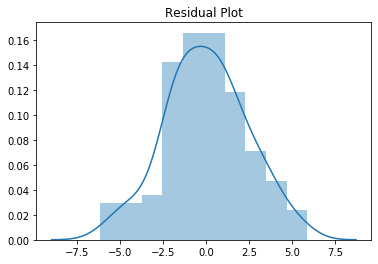

In [21]:
#plotting residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

In the above graph, since the mean is 0 and the distribution is normally distributed plot, we can conclude that the fundamental asumption of linear regression is respected. so no problem here



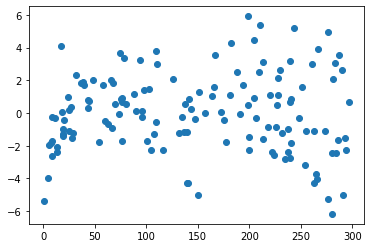

In [22]:
# Few things we can do to verify the above conclusion
# 1. check if the errors , residuals are normally distributed
# 2. Look for patterns in residuals and should not be able to identify any solid patterns, we can do that by plotting a scatterplot for the residuals

plt.scatter(X_train, res)
plt.show()

In the above graph, we see that 
1. Residuals are scattered by horizontal line y = 0, meaning the mean of the residuals is 0, normally distributed
2. Also there are no patterns
3. latter part of the plot the variance in residuals is quite high, its acceptable for this model 

We have two ways to verify id tyhe distributition is normal or not
1. Qualitative Analysis - in pactice, with few quantative techniques
2. Quantitative Analysis

# Step 4: Predictions & Evaluation on the Test Set

 use created model to make predictions on the test Set (y_test_pred)
 evaluate model accordingly, r-squared, on the test

In [23]:
# adding intercept for the test set
X_test_sm = sm.add_constant(X_test)

# prediction on test set

y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [24]:
#evaluationg the model
#r-squared

r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7921031601245658

In [25]:
#r2 data on training data set
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8157933136480389

In [26]:
#mean squared error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

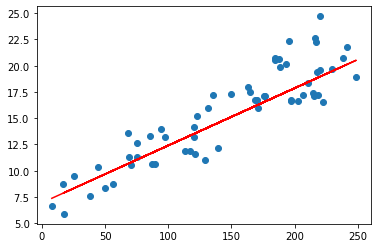

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

Never use the complete the data set.
Always look at the test set to see how well the model is doing.
Use of stats library is we will egt a nice summary.

# Using Sklearn model to prepare the model

In [28]:
# train test split
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.70, random_state=100)

In [39]:
X_train.shape
X_train_lm = X_train.values.reshape(-1, 1)
X_train_lm.shape
X_test_lm = X_test.values.reshape(-1,1)
X_test_lm.shape

(60, 1)

In [40]:
#steps in skleanrn modelling

#1. create an object
lm = LinearRegression()

#2. fit the model
lm.fit(X_train_lm, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#3. see the parameters of the model, make predictions on the nmodel(train , test).
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [43]:
#4. make predictions
y_train_predict = lm.predict(X_train_lm)
y_test_predict = lm.predict(X_test_lm)

In [46]:
#4.1 evaluate the model
print (r2_score(y_true=y_train, y_pred=y_train_pred))
print (r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245658
